In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [7]:
zip_file = ZipFile('../../data/raw/archive.zip')
df = pd.read_csv(zip_file.open('Online Retail Data Set.csv'), encoding='unicode_escape')

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df[df["Quantity"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [5]:
df['date'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['date_day'] = df['date'].dt.date

df_by_day = df.groupby("date_day", as_index=False).agg(
    {
        "UnitPrice": "sum",
        "CustomerID": "count",
        "Country": "count"
    }
)

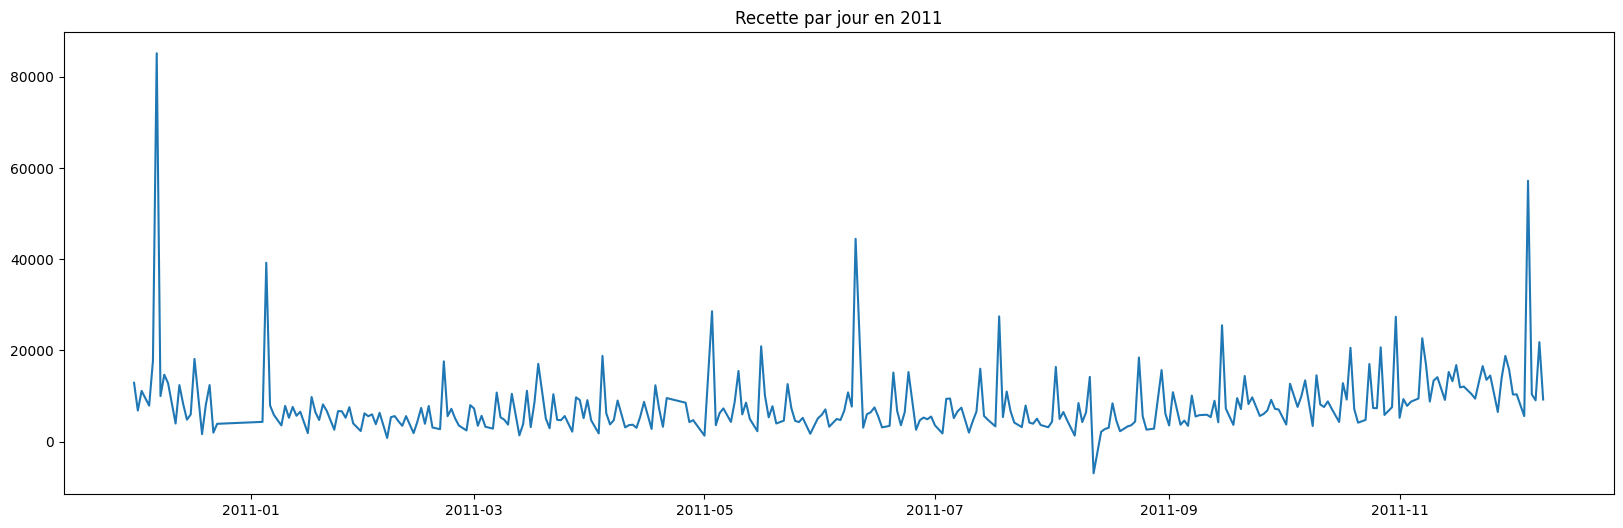

In [6]:
plt.figure(figsize=(20, 6))
plt.plot(df_by_day["date_day"], df_by_day["UnitPrice"])
plt.title("Recette par jour en 2011");

C:\Users\zaidi\AppData\Local\Temp\ipykernel_9640\2787299260.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = cleaned_data.set_index('InvoiceDate').resample('M').sum()['TotalSales']


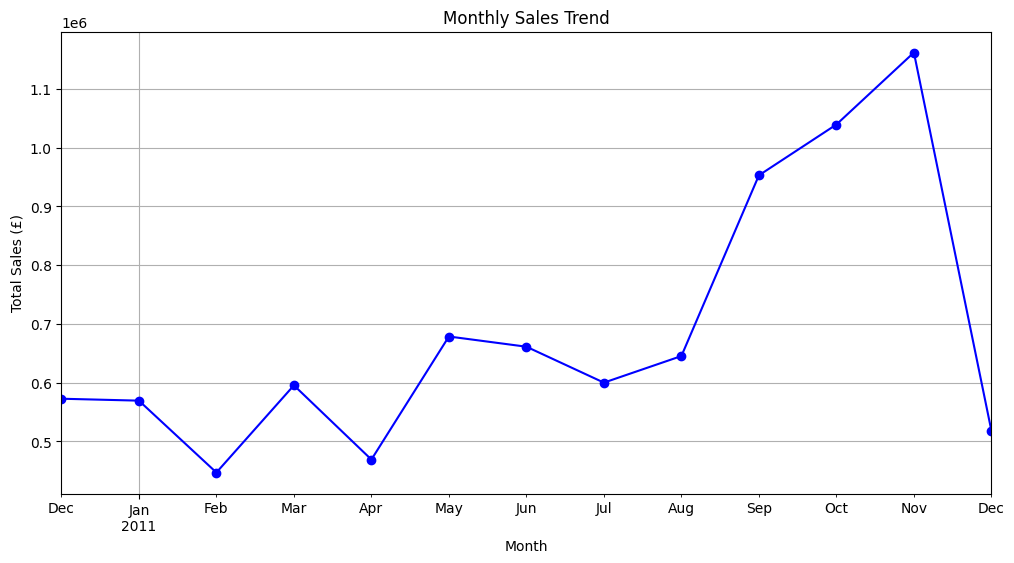

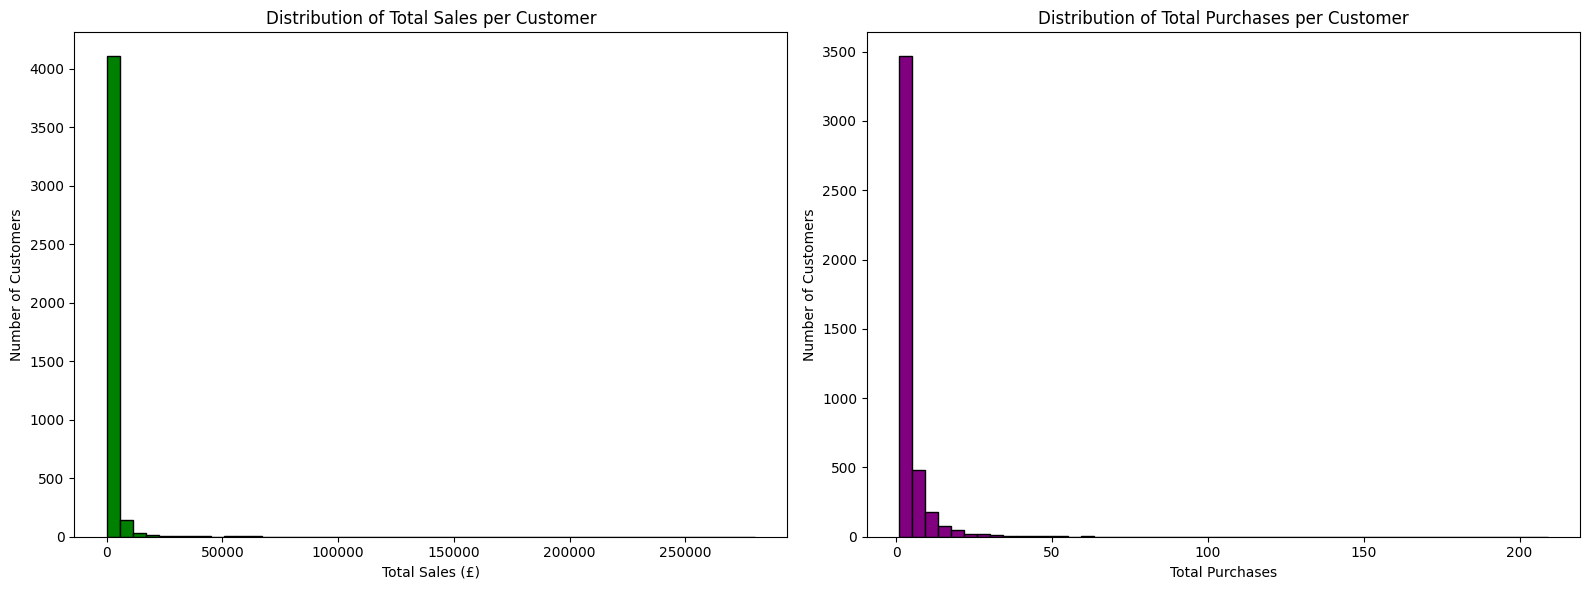

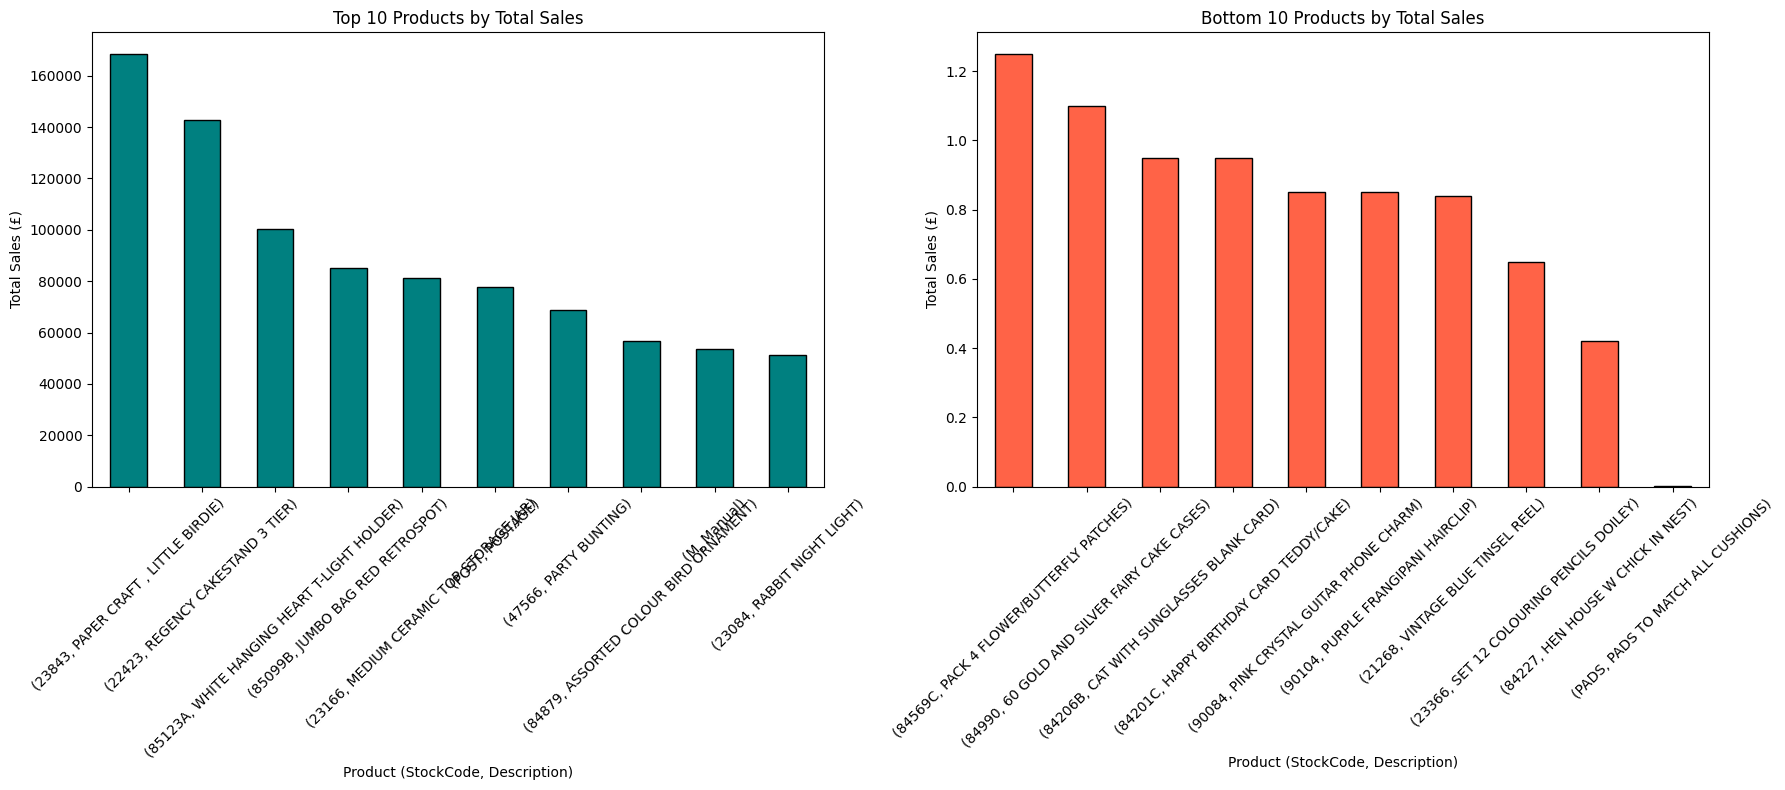

In [18]:
retail_data = df

cleaned_data = retail_data.dropna(subset=['Description', 'CustomerID'])
cleaned_data = cleaned_data[(cleaned_data['Quantity'] > 0) & (cleaned_data['UnitPrice'] > 0)]
cleaned_data['InvoiceDate'] = pd.to_datetime(cleaned_data['InvoiceDate'], format='%d-%m-%Y %H:%M')
cleaned_data['TotalSales'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

monthly_sales = cleaned_data.set_index('InvoiceDate').resample('M').sum()['TotalSales']
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Trend', color='blue', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.show()

customer_sales = cleaned_data.groupby('CustomerID').agg({'TotalSales': 'sum', 'InvoiceNo': pd.Series.nunique})
customer_sales.rename(columns={'InvoiceNo': 'TotalPurchases'}, inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
customer_sales['TotalSales'].plot(kind='hist', bins=50, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title('Distribution of Total Sales per Customer')
ax[0].set_xlabel('Total Sales (£)')
ax[0].set_ylabel('Number of Customers')
customer_sales['TotalPurchases'].plot(kind='hist', bins=50, ax=ax[1], color='purple', edgecolor='black')
ax[1].set_title('Distribution of Total Purchases per Customer')
ax[1].set_xlabel('Total Purchases')
ax[1].set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

product_sales = cleaned_data.groupby(['StockCode', 'Description']).agg({'Quantity': 'sum', 'TotalSales': 'sum'}).sort_values(by='TotalSales', ascending=False)
top_10_products = product_sales.head(10)
bottom_10_products = product_sales.tail(10)
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
top_10_products['TotalSales'].plot(kind='bar', ax=ax[0], color='teal', edgecolor='black')
ax[0].set_title('Top 10 Products by Total Sales')
ax[0].set_xlabel('Product (StockCode, Description)')
ax[0].set_ylabel('Total Sales (£)')
ax[0].tick_params(axis='x', rotation=45)
bottom_10_products['TotalSales'].plot(kind='bar', ax=ax[1], color='tomato', edgecolor='black')
ax[1].set_title('Bottom 10 Products by Total Sales')
ax[1].set_xlabel('Product (StockCode, Description)')
ax[1].set_ylabel('Total Sales (£)')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
